In [19]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import numpy as np

In [20]:
df = pd.read_csv(r'C:\Users\kaviy\Downloads\Day 68 country_wise_latest.csv')
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [21]:
print(df.isnull().sum())
print(df.shape)
print(df.columns)
print(df.describe)

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64
(187, 15)
Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')
<bound method NDFrame.describe of          Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    

In [22]:
total_countries =df['Country/Region'].nunique ()
print("Total Countries :",total_countries)

Total Countries : 187


In [23]:
total_confirmed= df['Confirmed'].sum()
print("Total Confirmed",total_confirmed)

Total Confirmed 16480485


In [11]:
total_death=df['Deaths'].sum()
print("total deaths:",total_death)

total deaths: 654036


In [12]:
total_recovered=df['Recovered'].sum()
print("Total recovered:",total_recovered)

Total recovered: 9468087


In [13]:
total_active=df['Active'].sum()
print("total active:",total_active)

total active: 6358362


In [19]:
global_recovery_rate=(total_recovered/total_confirmed)*100
print("GLOBAL RECOVERY RATE:{:.2f}%".format (global_recovery_rate))

GLOBAL RECOVERY RATE:57.45%


In [16]:
global_mortality_rate=(total_death/total_confirmed)*100
print("GLOBAL mortality RATE:{:.2f}%".format (global_mortality_rate))

GLOBAL mortality RATE:3.97%


In [20]:
total_regions=df['WHO Region'].nunique()
print("Total WHO regions:",total_regions)

Total WHO regions: 6


In [24]:
most_affected_country=df.loc[df['Confirmed'].idxmax(),'Country/Region']
print("most affected country(by confirmed cases):",most_affected_country)

most affected country(by confirmed cases): US


In [29]:
df['Recovery Rate']=(df['Recovered']/df['Confirmed'])*100
df['Recovery Rate'].replace([float('inf'),-float('inf')],0,inplace=True)
df['Recovery Rate'].fillna(0,inplace=True)

highest_recovery_rate=df.loc[df['Recovery Rate'].idxmax(),'Country/Region']
print("country with highest recovery rate:",highest_recovery_rate)



country with highest recovery rate: Dominica


C:\Users\kaviy\AppData\Local\Temp\ipykernel_19260\1995763278.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Recovery Rate'].replace([float('inf'),-float('inf')],0,inplace=True)
C:\Users\kaviy\AppData\Local\Temp\ipykernel_19260\1995763278.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [30]:
df['Mortality Rate']=(df['Deaths']/df['Confirmed'])*100
df['Mortality Rate'].replace([float('inf'),-float('inf')],0,inplace=True)
df['Mortality Rate'].fillna(0,inplace=True)

highest_mortality_rate=df.loc[df['Mortality Rate'].idxmax(),'Country/Region']
print("country with highest mortality rate:",highest_mortality_rate)

country with highest mortality rate: Yemen


C:\Users\kaviy\AppData\Local\Temp\ipykernel_19260\3077648881.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mortality Rate'].replace([float('inf'),-float('inf')],0,inplace=True)
C:\Users\kaviy\AppData\Local\Temp\ipykernel_19260\3077648881.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

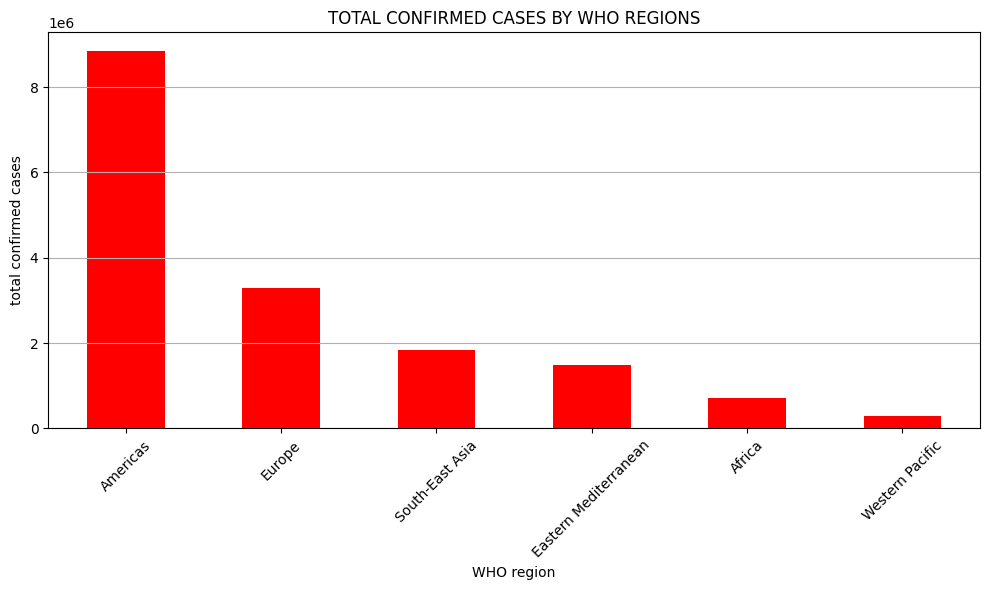

In [26]:
region_confirmed=df.groupby('WHO Region')['Confirmed'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
region_confirmed.plot(kind='bar',color='red')
plt.title("TOTAL CONFIRMED CASES BY WHO REGIONS")
plt.xlabel("WHO region")
plt.ylabel("total confirmed cases")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



C:\Users\kaviy\AppData\Local\Temp\ipykernel_4200\1430370258.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country/Region', y='Active',data=top10_active,palette="Reds_r")


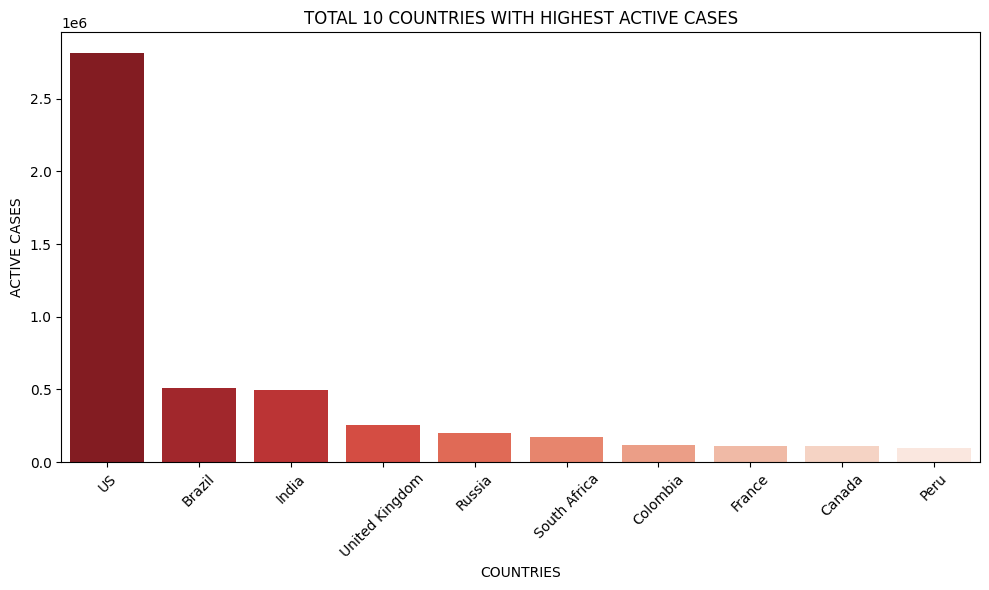

In [25]:
top10_active=df.sort_values(by="Active",ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Country/Region', y='Active',data=top10_active,palette="Reds_r")
plt.title("TOTAL 10 COUNTRIES WITH HIGHEST ACTIVE CASES")
plt.xlabel("COUNTRIES")
plt.ylabel("ACTIVE CASES")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


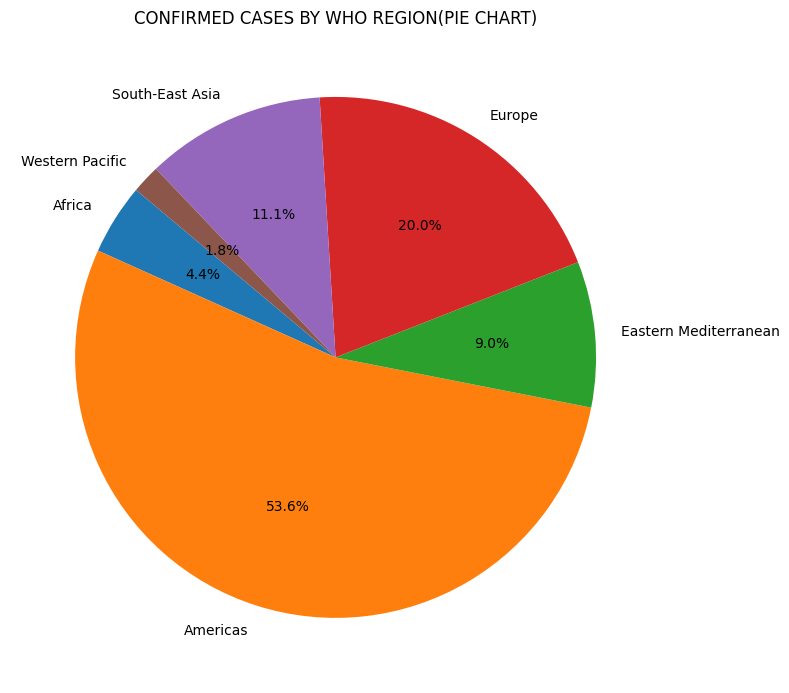

In [28]:
region_cases=df.groupby("WHO Region")['Confirmed'].sum()
plt.figure(figsize=(8,8))
plt.pie(region_cases,labels=region_cases.index, autopct='%1.1f%%',startangle=140)
plt.title("CONFIRMED CASES BY WHO REGION(PIE CHART)")
plt.tight_layout()
plt.show()


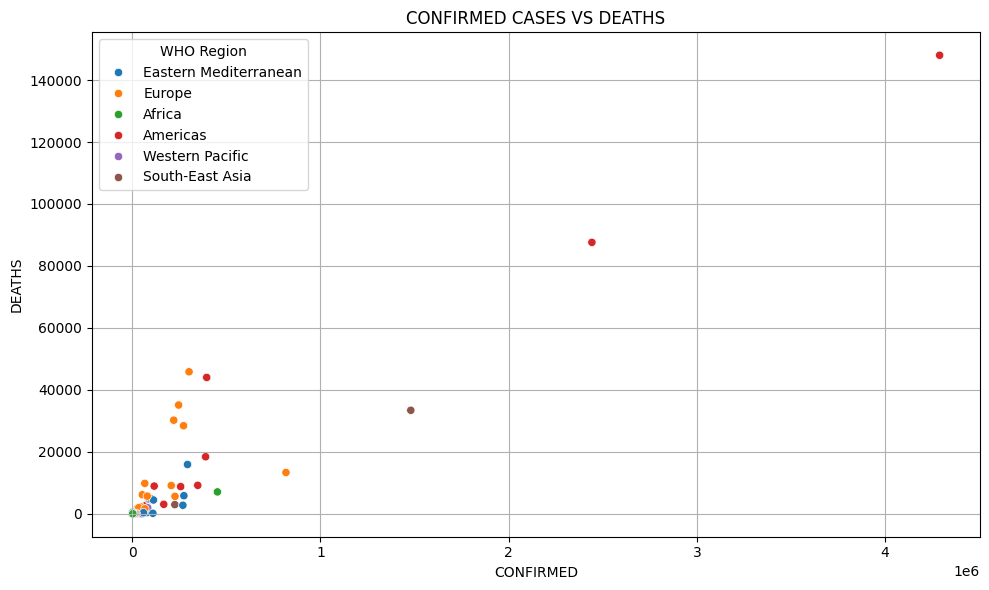

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Confirmed",y="Deaths", hue ="WHO Region",data=df)
plt.title("CONFIRMED CASES VS DEATHS")
plt.xlabel("CONFIRMED")
plt.ylabel("DEATHS")
plt.grid(True)
plt.tight_layout()
plt.show()


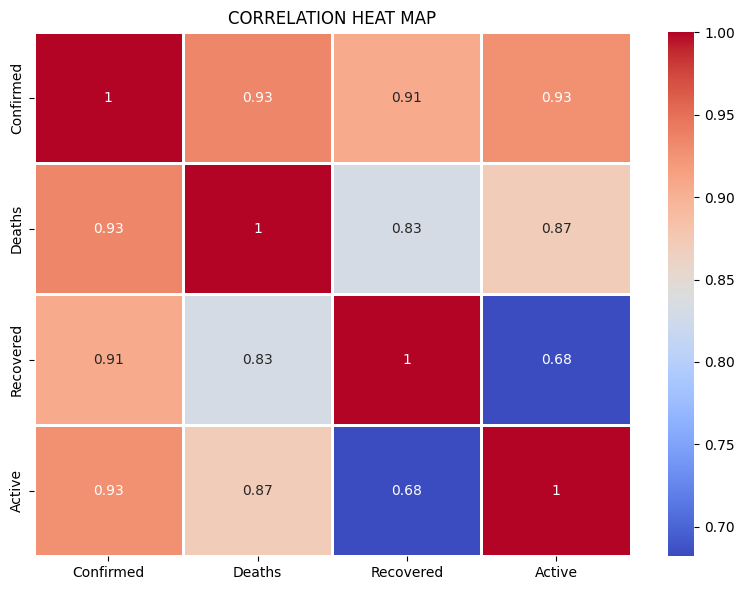

In [30]:
correlation=df[['Confirmed','Deaths','Recovered','Active']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation , annot=True,cmap='coolwarm',linewidth=0.8)
plt.title("CORRELATION HEAT MAP")
plt.tight_layout()
plt.show()


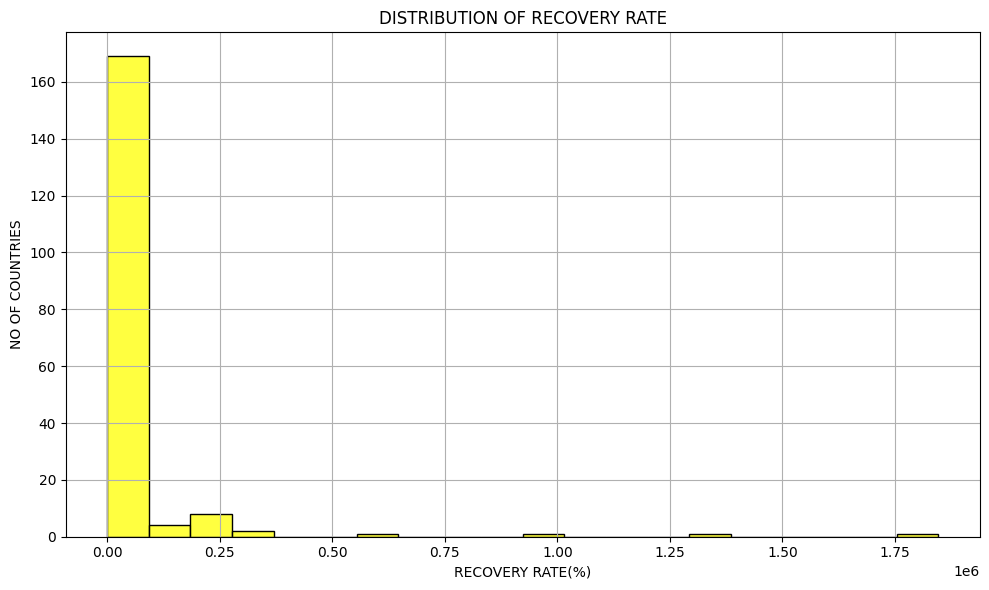

In [42]:
plt.figure(figsize=(10,6))
sns.histplot(df['Recovered'], bins=20,color='yellow')
plt.title("DISTRIBUTION OF RECOVERY RATE")
plt.xlabel("RECOVERY RATE(%)")
plt.ylabel("NO OF COUNTRIES")
plt.grid(True)
plt.tight_layout()
plt.show()


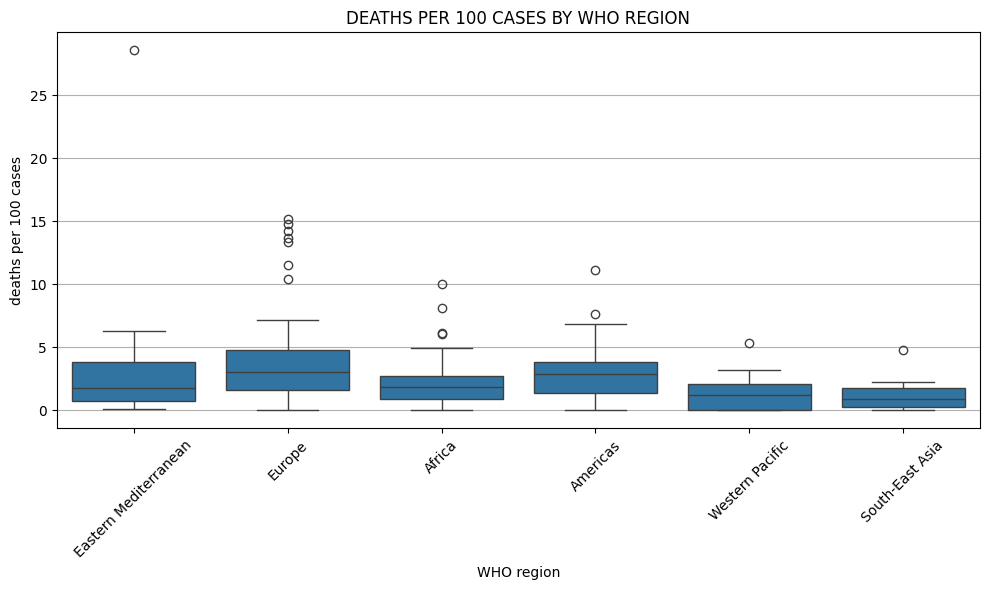

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(x="WHO Region",y="Deaths / 100 Cases" ,data=df)
plt.title("DEATHS PER 100 CASES BY WHO REGION")
plt.xlabel("WHO region")
plt.ylabel("deaths per 100 cases")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

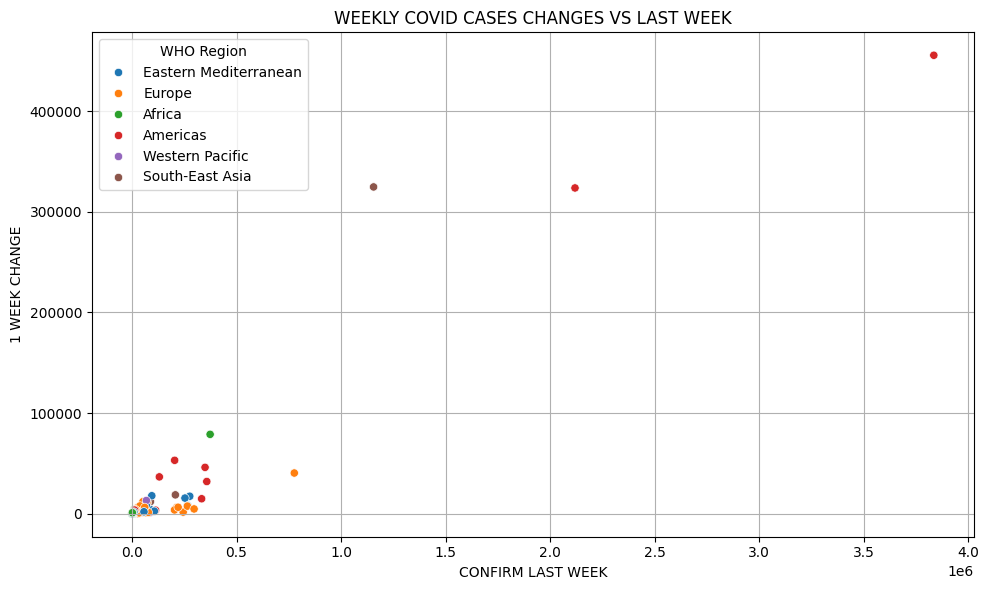

In [63]:
if 'Confirmed last week' in df.columns and '1 week change' in df.columns:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df,x='Confirmed last week', y='1 week change',hue='WHO Region')
    plt.title("WEEKLY COVID CASES CHANGES VS LAST WEEK")
    plt.xlabel("CONFIRM LAST WEEK")
    plt.ylabel("1 WEEK CHANGE")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("REQUIRED COLUMN NOT FOUND: 'Confirmed last week' & '1 week change'")


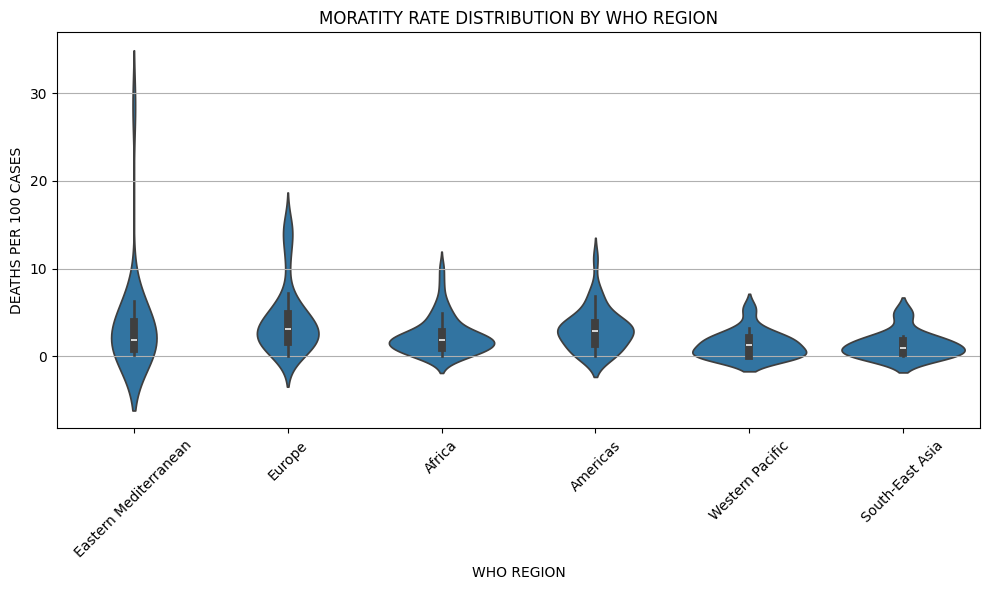

In [65]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df,x='WHO Region',y='Deaths / 100 Cases')
plt.title("MORATITY RATE DISTRIBUTION BY WHO REGION")
plt.xlabel("WHO REGION")
plt.ylabel("DEATHS PER 100 CASES")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [79]:
import dash
print("Dash is installed and working!")


Dash is installed and working!


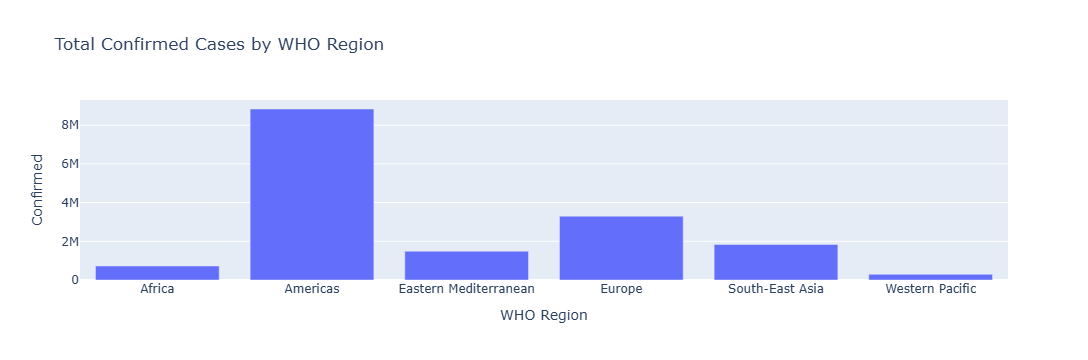

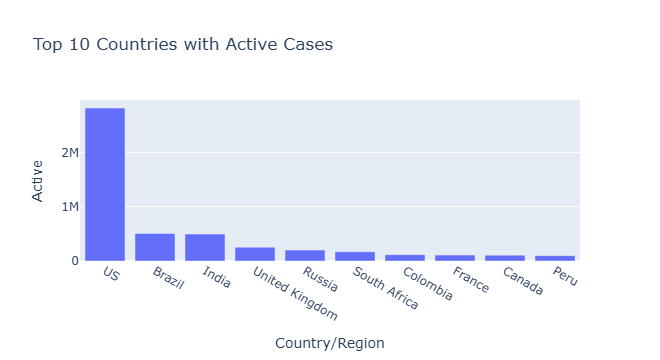

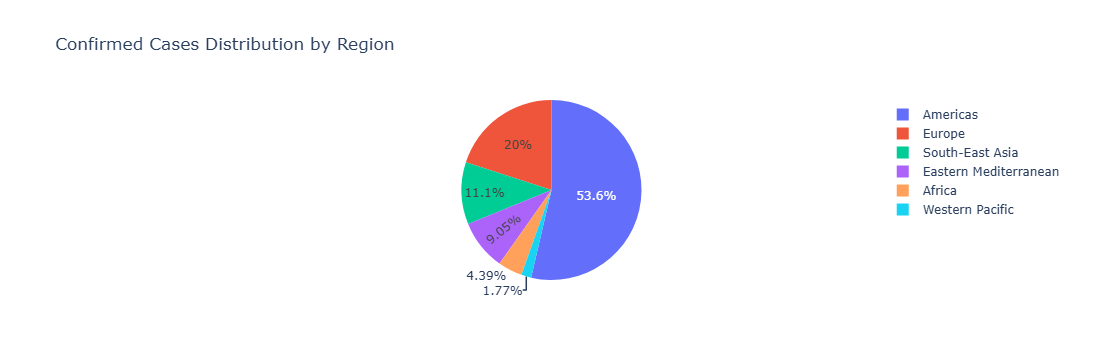

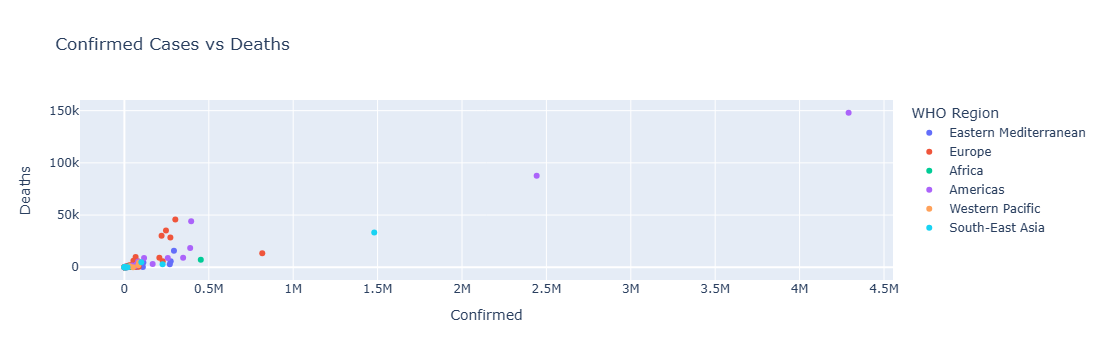

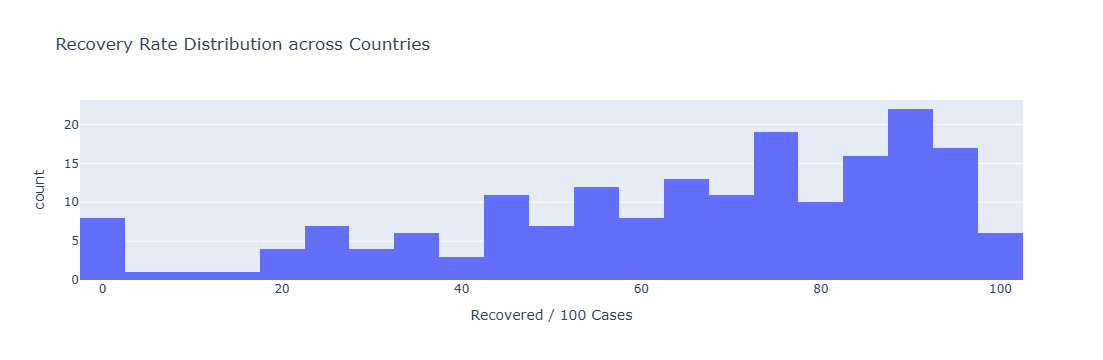

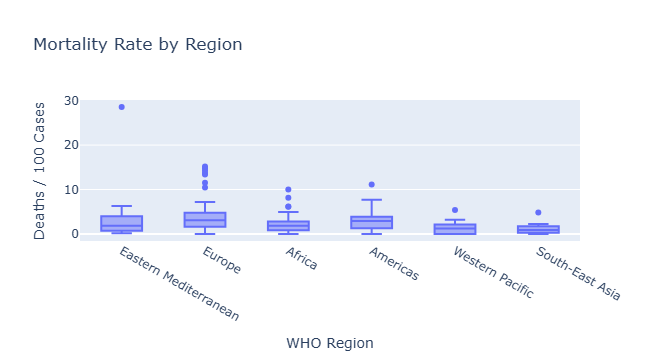

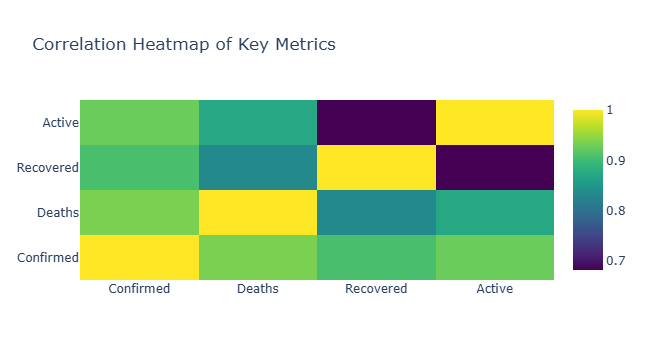

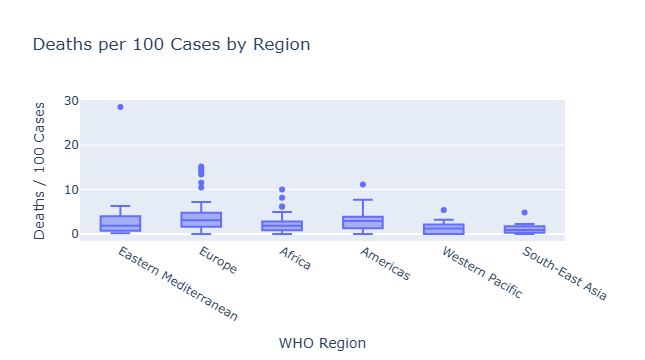

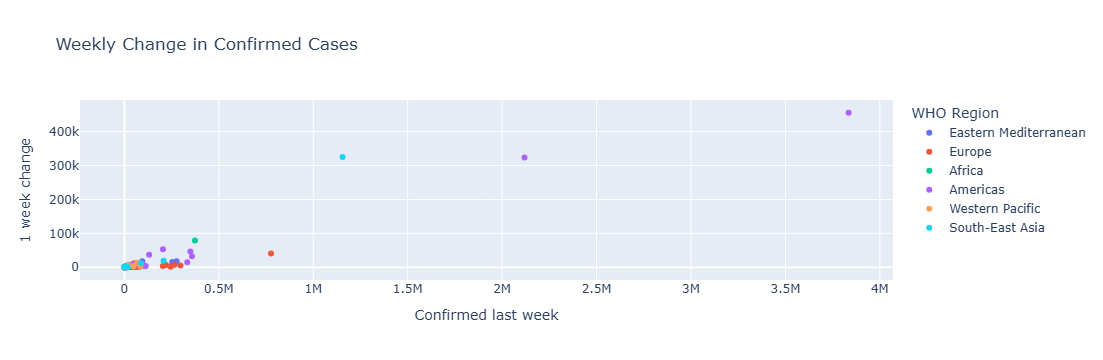

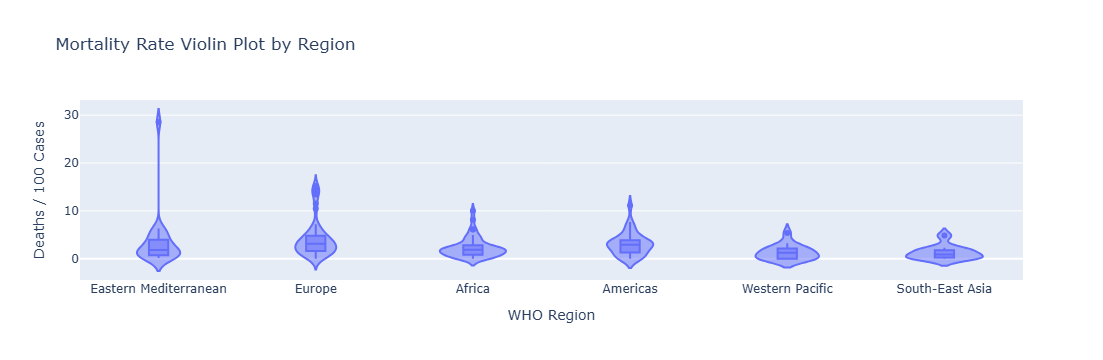

In [99]:


chart1 = px.bar(df.groupby('WHO Region')['Confirmed'].sum().reset_index(),
                x='WHO Region', y='Confirmed', title='Total Confirmed Cases by WHO Region')

chart2 = px.bar(df.sort_values('Active', ascending=False).head(10),
                x='Country/Region', y='Active', title='Top 10 Countries with Active Cases')

chart3 = px.pie(df, names='WHO Region', values='Confirmed',
                title='Confirmed Cases Distribution by Region')

chart4 = px.scatter(df, x='Confirmed', y='Deaths', color='WHO Region',
                    title='Confirmed Cases vs Deaths')

chart5 = px.histogram(df, x='Recovered / 100 Cases', nbins=30,
                      title='Recovery Rate Distribution across Countries')

chart6 = px.box(df, x='WHO Region', y='Deaths / 100 Cases',
                title='Mortality Rate by Region')

correlation = df[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr()
chart7 = go.Figure(data=go.Heatmap(z=correlation.values,
                                   x=correlation.columns,
                                   y=correlation.columns,
                                   colorscale='Viridis'))
chart7.update_layout(title='Correlation Heatmap of Key Metrics')

chart8 = px.box(df, x='WHO Region', y='Deaths / 100 Cases',
                title='Deaths per 100 Cases by Region')

if 'Confirmed last week' in df.columns and '1 week change' in df.columns:
    chart9 = px.scatter(df, x='Confirmed last week', y='1 week change',
                        color='WHO Region',
                        title='Weekly Change in Confirmed Cases')
else:
    chart9 = go.Figure()
    chart9.update_layout(title='Weekly Change Data Not Available')

chart10 = px.violin(df, x='WHO Region', y='Deaths / 100 Cases', box=True,
                    title='Mortality Rate Violin Plot by Region')

chart1.show()
chart2.show()
chart3.show()
chart4.show()
chart5.show()
chart6.show()
chart7.show()
chart8.show()
chart9.show()
chart10.show()


In [117]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1("🧬 COVID-19 Data Dashboard", style={'textAlign': 'center'}),

    dcc.Graph(figure=chart1),
    dcc.Graph(figure=chart2),
    dcc.Graph(figure=chart3),
    dcc.Graph(figure=chart4),
    dcc.Graph(figure=chart5),
    dcc.Graph(figure=chart6),
    dcc.Graph(figure=chart7),
    dcc.Graph(figure=chart8),
    dcc.Graph(figure=chart9),
    dcc.Graph(figure=chart10),

    html.P("", style={'textAlign': 'center', 'marginTop': '20px'})
])

In [118]:
from dash import Dash, dcc, html


In [119]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1("🧬 COVID-19 Data Dashboard", style={'textAlign': 'center'}),

    dcc.Graph(figure=chart1),
    dcc.Graph(figure=chart2),
    dcc.Graph(figure=chart3),
    dcc.Graph(figure=chart4),
    dcc.Graph(figure=chart5),
    dcc.Graph(figure=chart6),
    dcc.Graph(figure=chart7),
    dcc.Graph(figure=chart8),
    dcc.Graph(figure=chart9),
    dcc.Graph(figure=chart10),

    html.P("", style={'textAlign': 'center', 'marginTop': '20px'})
])

In [120]:
if __name__ == '__main__':
    app.run(debug=True)
